In [24]:
%matplotlib
matplotlib.pyplot.switch_backend('nbAgg') 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: GTK3Agg


In [25]:
filename = '/home/andreas/Physik/genetic/genetic_2018-06-22 17:02:20.mat'
data = scipy.io.loadmat(filename)

In [26]:
def pulse_rwa(t, args):
    wgrund = args[0]
    fcomps = args[1]
    pulse = 0
    for i in range(len(fcomps)):
        pulse = pulse+(fcomps[i])*np.sin((i+1)*wgrund*t)
    return pulse

In [27]:
wgrund = float(data['wgrund'])*1e6
fcomps = data['fourier']
t = np.squeeze(data['time'])*1e-6
tf = np.linspace(0, t[-1], 1000)
tp = np.linspace(0, t[-1]*2, 1000)

In [28]:
pfi = pulse_rwa(tf, [wgrund, fcomps[:,0]])
pfq = pulse_rwa(tf, [wgrund, fcomps[:,1]])


pfip = pulse_rwa(tp, [wgrund, fcomps[:,0]])
pfqp = pulse_rwa(tp, [wgrund, fcomps[:,1]])

In [29]:
repeat_factor = 10000
pfin = np.tile(pfip, repeat_factor)
pfqn = np.tile(pfqp, repeat_factor)
tfn = np.linspace(0, tp[-1]*repeat_factor, len(pfin))

In [30]:
fi = np.fft.fft(pfin)
fq = np.fft.fft(pfqn)
freq = np.fft.fftfreq(tfn.shape[-1], d=(tfn[2]-tfn[1]))

<IPython.core.display.Javascript object>


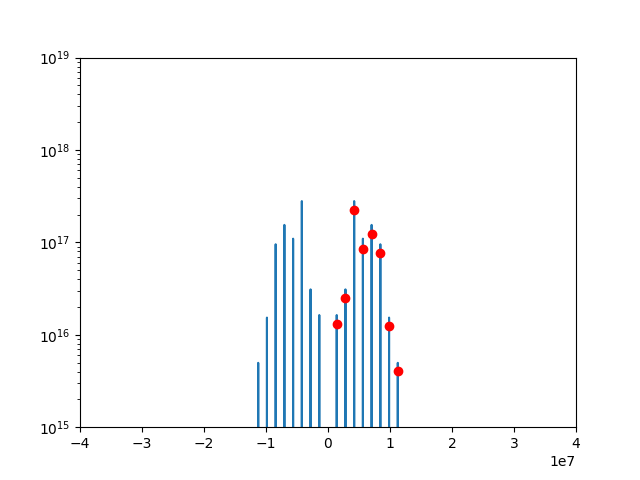

In [67]:
plt.semilogy(freq, abs(fi)**2+abs(fq)**2)
xlim([-40e6, 40e6])
ylim([10e14, 10e18])
fc = data['fourier'][:,0]**2+data['fourier'][:,1]**2
fs = np.array([wgrund*(i+1)/2/np.pi for i in range(len(data['fourier']))])
plt.semilogy(fs, fc*2*10e12, 'ro')